<a href="https://www.kaggle.com/code/akhileshkumaryadav/notebookf58b804be8?scriptVersionId=90844207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx


In [ ]:
pip install openpyxl

     |████████████████████████████████| 242 kB 888 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [ ]:
train_df = pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_df.dropna(axis=0, inplace=True)
train_df.drop_duplicates(keep='first',inplace=True)

In [ ]:
train_df.shape

(10462, 11)

In [ ]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
train_df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [ ]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
train_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
train_df.shape

(10462, 11)

In [ ]:
stops_map = {'non-stop':0,
             '2 stops':2,
             '1 stop':1, 
             '3 stops':3,
             '4 stops':4}
train_df['Total_Stops'] = train_df['Total_Stops'].map(stops_map)
train_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
def date_convert(value):
    try:
        date = datetime.strptime(value, "%d/%m/%Y")
    except:
        date = 0
    return date

In [ ]:
train_df['Date_of_Journey'] = train_df['Date_of_Journey'].apply(date_convert)
train_df = train_df[train_df['Date_of_Journey']!=0]
print(train_df)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 

In [ ]:
train_df['Date_of_Journey'] = train_df['Date_of_Journey'].astype('datetime64')

In [ ]:
def duration_in_min(value):
    if len(value)<=3 and value[-1]=='m':
        minutes = int(value.split('m')[0])
    elif len(value)<=3 and value[-1]=='h':
         minutes = int(value.split('h')[0])*60
    else:
        val1 = value.split('h')[0]
        val2 = value.split('h ')[1]
        val3 = val2.split('m')[0]
        minutes = int(val1)*60+int(val3)
    return minutes

In [ ]:
train_df['Duration_in_min'] = train_df['Duration'].apply(duration_in_min)

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285


In [ ]:
for i in ['Dep_Time', 'Arrival_Time']:
    train_df[i]=pd.to_datetime(train_df[i])

In [ ]:
train_df['Journey_day'] = train_df['Date_of_Journey'].dt.day
train_df['Journey_month'] = train_df['Date_of_Journey'].dt.month

train_df['Dept_hour'] = train_df['Dep_Time'].dt.hour
train_df['Dept_min'] = train_df['Dep_Time'].dt.minute

train_df['Arrv_hour'] = train_df['Arrival_Time'].dt.hour
train_df['Arrv_min'] = train_df['Arrival_Time'].dt.minute

In [ ]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_min,Journey_day,Journey_month,Dept_hour,Dept_min,Arrv_hour,Arrv_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-21 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,3897,170,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-21 05:50:00,2022-03-21 13:15:00,7h 25m,2,No info,7662,445,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-21 09:25:00,2022-06-10 04:25:00,19h,2,No info,13882,1140,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-03-21 18:05:00,2022-03-21 23:30:00,5h 25m,1,No info,6218,325,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-03-21 16:50:00,2022-03-21 21:35:00,4h 45m,1,No info,13302,285,1,3,16,50,21,35


In [ ]:
train_df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],inplace=True)

In [ ]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_in_min,Journey_day,Journey_month,Dept_hour,Dept_min,Arrv_hour,Arrv_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,170,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7662,445,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,13882,1140,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,325,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,13302,285,1,3,16,50,21,35


In [ ]:
#train_df['Destination'] = train_df['Destination'].replace("New Delhi","Delhi")
train_df['Additional_Info'] = train_df['Additional_Info'].replace('No info','No Info')
train_df.describe()

,Total_Stops,Price,Duration_in_min,Journey_day,Journey_month,Dept_hour,Dept_min,Arrv_hour,Arrv_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,629.781591,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939
std,0.660609,4624.849541,500.699045,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450
min,0.000000,1759.000000,5.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,170.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,1.000000,8266.000000,505.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,1.000000,12344.750000,910.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,4.000000,79512.000000,2860.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),['Airline','Source','Destination','Additional_Info'])
]
,remainder='passthrough')

In [ ]:
trf.fit_transform(train_df)
trf.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['trf__x0_Air India',
 'trf__x0_GoAir',
 'trf__x0_IndiGo',
 'trf__x0_Jet Airways',
 'trf__x0_Jet Airways Business',
 'trf__x0_Multiple carriers',
 'trf__x0_Multiple carriers Premium economy',
 'trf__x0_SpiceJet',
 'trf__x0_Trujet',
 'trf__x0_Vistara',
 'trf__x0_Vistara Premium economy',
 'trf__x1_Chennai',
 'trf__x1_Delhi',
 'trf__x1_Kolkata',
 'trf__x1_Mumbai',
 'trf__x2_Cochin',
 'trf__x2_Delhi',
 'trf__x2_Hyderabad',
 'trf__x2_Kolkata',
 'trf__x2_New Delhi',
 'trf__x3_1 Short layover',
 'trf__x3_2 Long layover',
 'trf__x3_Business class',
 'trf__x3_Change airports',
 'trf__x3_In-flight meal not included',
 'trf__x3_No Info',
 'trf__x3_No check-in baggage included',
 'trf__x3_Red-eye flight',
 'Total_Stops',
 'Price',
 'Duration_in_min',
 'Journey_day',
 'Journey_month',
 'Dept_hour',
 'Dept_min',
 'Arrv_hour',
 'Arrv_min']

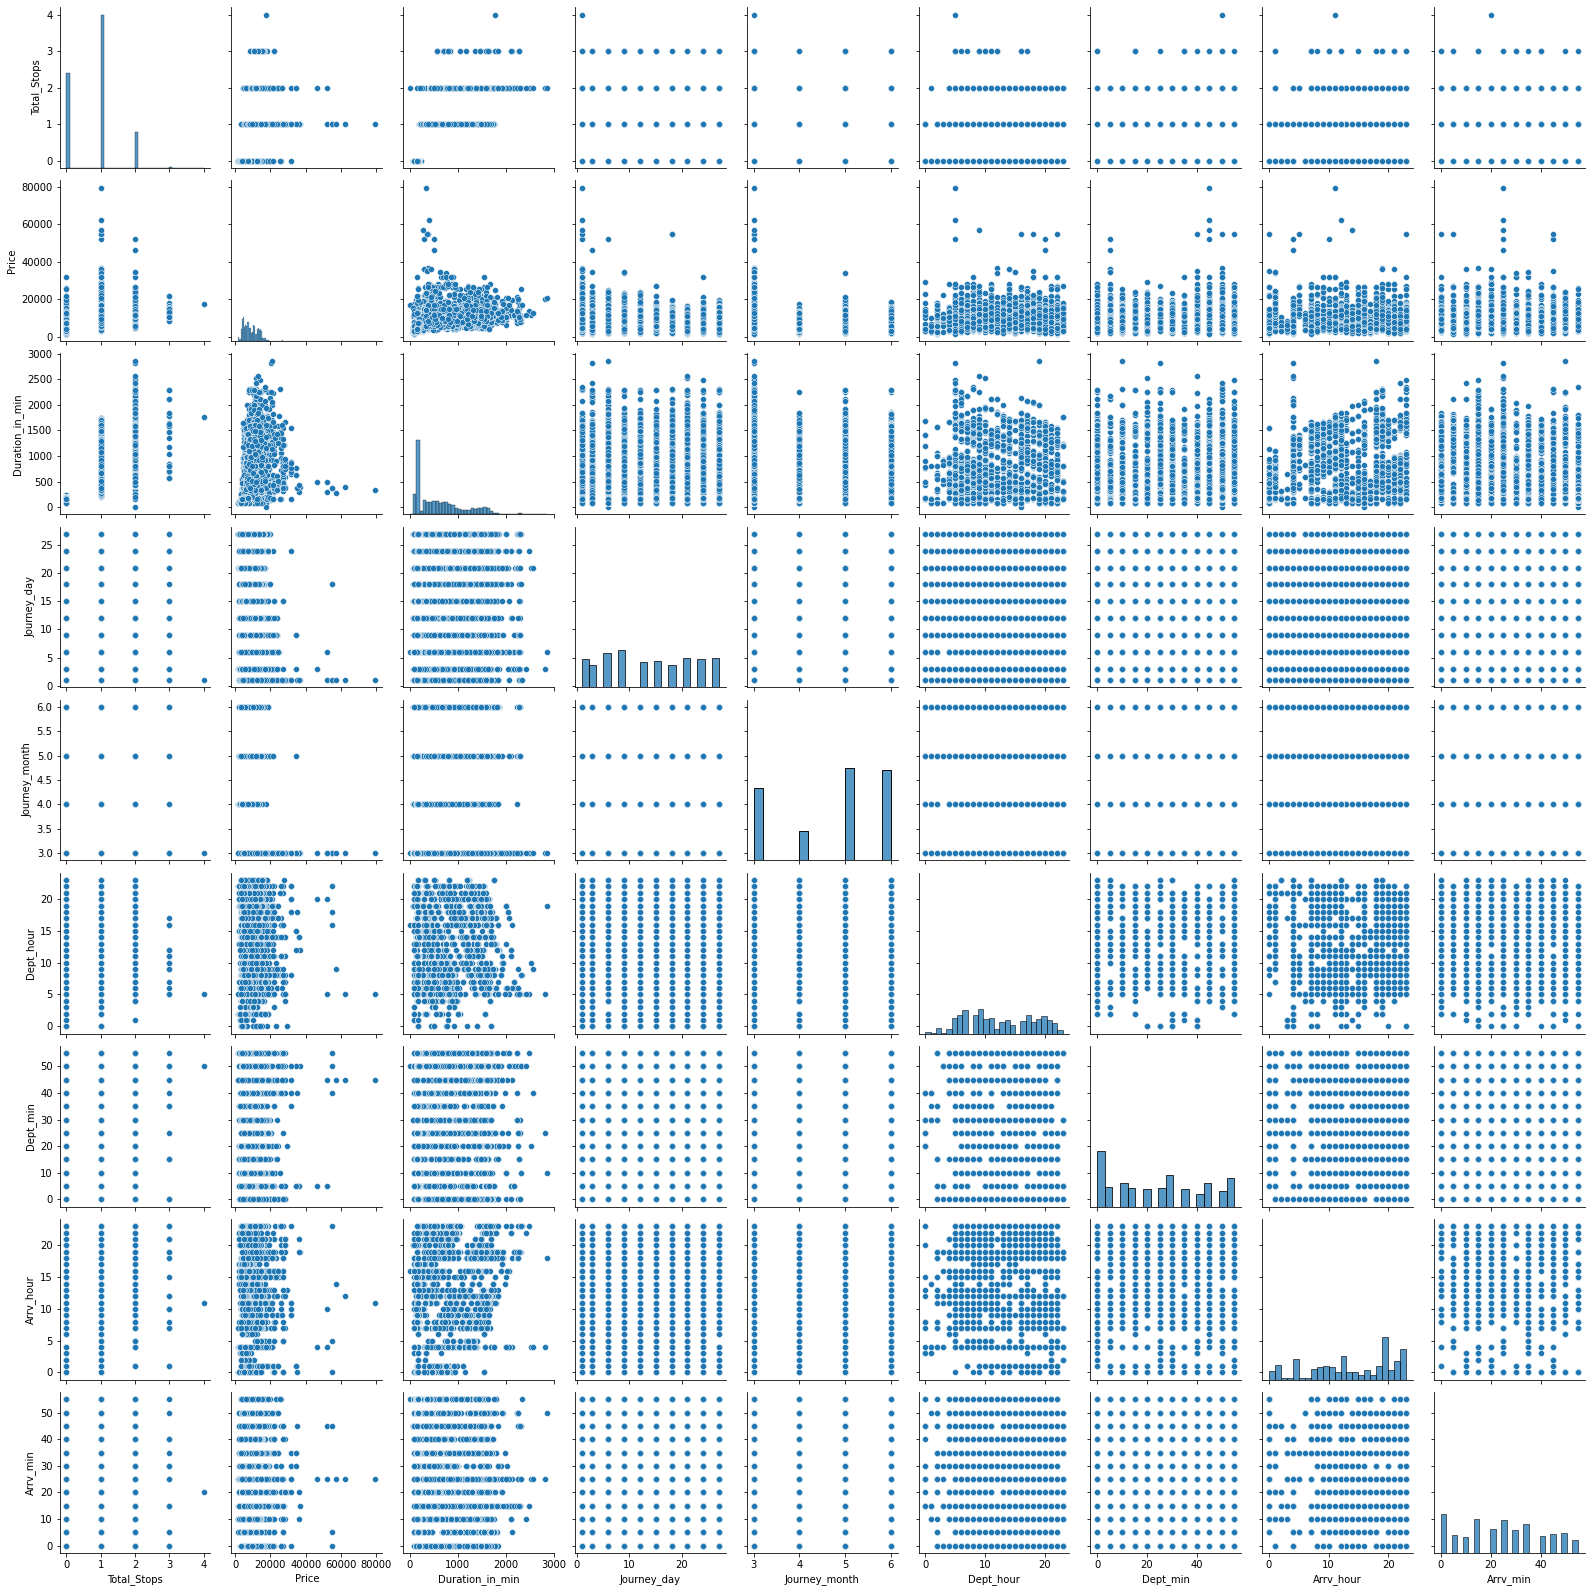

In [ ]:
sns.pairplot(train_df)

In [ ]:
#train_df.drop(train_df.index[train_df['Airline']=='Trujet'], axis = 0, inplace=True)
#train_df.drop(train_df.index[train_df['Additional_Info']=='1 Short layover'], axis = 0, inplace=True)

X = train_df.drop(columns=['Price'])
y = train_df['Price']

In [ ]:
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential, Input
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
x_train , x_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25,random_state=11)

In [ ]:
def create_model(optimizer='adam',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.1):
    model = Sequential()
    #model.add(Input(shape=(x_train.shape[1],)))
    #model.add(Dense(128,activation='relu',kernel_initializer=kernel_initializer, input_dim=36))
    model.add(Dense(128,activation='relu',input_dim=36))
    model.add(Dropout(dropout))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mae'])
    model.summary()

    return model

# wrap the model using the function you created
clf = KerasRegressor(build_fn=create_model,epochs=200, verbose=2)
# droping null and duplicates helped improve the DL model alot (from .0 to .7)
# Scaler then helped from .79 to .83

In [ ]:
models = [LinearRegression(),
         Ridge(),
         Lasso(),
         DecisionTreeRegressor(),
         ExtraTreesRegressor(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         SVR(),
         KNeighborsRegressor(),
         XGBRegressor(),
         GaussianNB(),
         BernoulliNB(),
         clf]

In [ ]:
for i in models:
    pipe = Pipeline([
        ('step1',trf),
        ('step2',StandardScaler()),
        ('step3',i)
    ])
    print(i)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_valid)
    print("R2 = ",r2_score(y_valid,y_pred))
    print("MAE = ",mean_absolute_error(y_valid,y_pred))
    print()

LinearRegression()
R2 =  0.6871889314035868
MAE =  1792.545496021653

Ridge()
R2 =  0.6880849110154006
MAE =  1785.420219480463

Lasso()
R2 =  0.6880087717410069
MAE =  1785.5682950850237

DecisionTreeRegressor()
R2 =  0.7912683353549079
MAE =  793.1767966360857

ExtraTreesRegressor()
R2 =  0.8981145447776654
MAE =  653.7045578491335

RandomForestRegressor()
R2 =  0.873450158495619
MAE =  720.4887967088977

GradientBoostingRegressor()
R2 =  0.8040813080458756
MAE =  1296.8083610641866

SVR()
R2 =  0.04104233087286957
MAE =  3437.2682202368787

KNeighborsRegressor()
R2 =  0.8029969051545355
MAE =  1063.6177370030582

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, m

2022-03-21 15:04:11.242580: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-21 15:04:11.437464: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4736      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6